<a href="https://colab.research.google.com/github/AlejandroAlberoni/treinamento-h2ia/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN** (K-Nearest Neighbors) is a unsupervised machine learning technique. It's idea is to classify new incoming data with the closest reference data(labeled ones). 

**This notebook uses KNN to classify new values. It is trained with Fisher's iris dataset.**

In [21]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as mpl
from copy import deepcopy
import pandas
import numpy
import math
import random
%matplotlib inline

In [22]:
iris_rawdata = load_iris()
iris_df = pandas.DataFrame(iris_rawdata['data'])
pca = PCA(n_components=2)
final_components = pca.fit_transform(iris_df)
fc_df = pandas.DataFrame(final_components)
fc_df['group'] = deepcopy(iris_rawdata.target)

In [23]:
class KNN:
    def __init__(self, data, k):
        self.data = deepcopy(data)
        self.k = k
        self.new_data = pandas.DataFrame({'0': [], '1': [], 'group': []})

    def perform(self, unclassified_data):
        distances = [self.get_distance([row[0], row[1]], unclassified_data) for i, row in self.data.iterrows()]
        n_min_index = numpy.argpartition(distances, self.k - 1)[:self.k]
        group_from_index = [int(self.data.iloc[i]['group']) for i in n_min_index]
        uniq, counts = numpy.unique(group_from_index, return_counts=True)
        if list(counts).count(counts[0]) > 1:
            rn_chooser = random.choice([uniq[i] for i in range(len(uniq)) if counts[i] == counts[0]])
            self.new_data.loc[len(self.new_data)] = {'0': unclassified_data[0], '1': unclassified_data[1], 'group': rn_chooser}
        else:
            self.new_data.loc[len(self.new_data)] = {'0': unclassified_data[0], '1': unclassified_data[1], 'group': uniq[0]}

    def get_distance(self, target, point):
        distance = math.sqrt(pow(point[0] - target[0], 2) + pow(point[1] - target[1], 2))
        return distance

    def predict(self):
        points = []
        p_quantity = int(input('How many (random)points you want to classify? : '))
        for i in range(p_quantity):
            random_point = self.get_random_input()
            points.append(random_point)
            self.perform(random_point)

    def get_random_input(self):
        return [random.uniform(self.data[0].min(), self.data[0].max()), random.uniform(self.data[1].min(), self.data[1].max())]

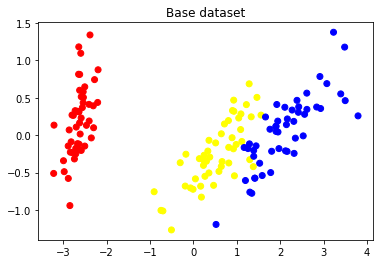

In [24]:
colors = ['red', 'yellow', 'blue']
p_colors = [colors[i] for i in knn.data['group'].to_list()]
mpl.scatter(knn.data[0], knn.data[1], c=p_colors)
mpl.title('Base dataset')
mpl.show()

In [49]:
knn = KNN(data=fc_df, k=7)
knn.predict()

How many (random)points you want to classify? : 50


**50 random points**

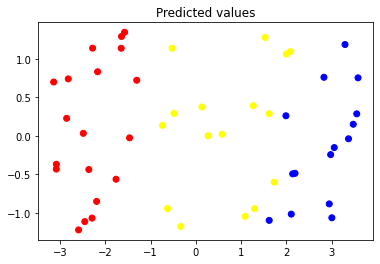

In [50]:
s_colors = [colors[int(i)] for i in knn.new_data['group']]
mpl.scatter(knn.new_data['0'], knn.new_data['1'], c=s_colors)
mpl.title('Predicted values')
mpl.show()